In [2]:
%load_ext autoreload 
%autoreload 2

In [3]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import time
import glob
import pickle
import pandas as pd
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

In [4]:
import sys

In [5]:
from pyuoi.linear_model.var import VAR

In [6]:
sys.path.append('/home/akumar/nse/neural_control')
from utils import apply_df_filters, calc_loadings
from loaders import load_sabes
from subspaces import SubspaceIdentification, IteratedStableEstimator, estimate_autocorrelation

In [7]:
dpath = '/mnt/Secondary/data/sabes/'

In [7]:
with open('/home/akumar/nse/neural_control/data/sabes_decoding_df.dat', 'rb') as f:
    sabes_df = pickle.load(f)

### Group Meeting Plots

In [9]:
np.unique(sabes_df['dimreduc_method'].values)

array(['DCA', 'KCA', 'LQGCA', 'PCA'], dtype=object)

In [10]:
# Take d=6 and compare DCA and PCA, fit subspace identification and VAR ols model and then plot spectra/polar decompositions

In [11]:
from tqdm import tqdm

In [13]:
data_files = np.unique(sabes_df['data_file'].values)

In [14]:
cc_results = []

for i, data_file in tqdm(enumerate(data_files)):
    dat = load_sabes('%s/%s' % (dpath, data_file))
    y = np.squeeze(dat['spike_rates'])
    for dimreduc_method in ['DCA', 'KCA', 'LQGCA', 'PCA']:
        df_ = apply_df_filters(sabes_df, data_file=data_file, fold_idx=0, dim=10, dimreduc_method=dimreduc_method)
        if dimreduc_method == 'LQGCA':
            df_ = apply_df_filters(df_, dimreduc_args={'T': 3, 'loss_type': 'trace', 'n_init': 5})
        V = df_.iloc[0]['coef']
        if dimreduc_method == 'PCA':
            V = V[:, 0:10]        
        # Project data
        yproj = y @ V
        ccm = estimate_autocorrelation(yproj, 10)
        # Identify canonical correlation coefficients
        ssid = SubspaceIdentification(estimator=IteratedStableEstimator)
        ht = ssid.form_hankel_toeplitz(ccm, 4)
        cc_ = {}
        cc_['data_file'] = data_file
        cc_['drm'] = dimreduc_method
        cc_['cc'] = ht[1]
        cc_results.append(cc_)

0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.03s/it]
1it [00:16, 16.40s/it]

Processing spikes


100%|██████████| 1/1 [00:22<00:00, 22.32s/it]
2it [00:39, 20.12s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.54s/it]
3it [00:43, 13.09s/it]

Processing spikes


100%|██████████| 1/1 [00:30<00:00, 30.72s/it]
4it [01:15, 20.24s/it]

Processing spikes


100%|██████████| 1/1 [00:13<00:00, 13.35s/it]
5it [01:28, 17.86s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.46s/it]
6it [01:32, 13.03s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.26s/it]
7it [01:35,  9.90s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.20s/it]
8it [01:40,  8.14s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.77s/it]
9it [01:44,  6.83s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.38s/it]
10it [01:47,  5.83s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
11it [01:52,  5.49s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.50s/it]
12it [01:57,  5.25s/it]

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.15s/it]
13it [02:03,  5.58s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.74s/it]
14it [02:08,  5.39s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.77s/it]
15it [02:13,  5.26s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
16it [02:18,  5.10s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.30s/it]
17it [02:22,  4.92s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.63s/it]
18it [02:27,  4.90s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.55s/it]
19it [02:32,  4.86s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.26s/it]
20it [02:37,  5.04s/it]

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.71s/it]
21it [02:44,  5.61s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.07s/it]
22it [02:48,  5.20s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.07s/it]
23it [02:54,  5.23s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.33s/it]
24it [02:59,  5.32s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.57s/it]
25it [03:05,  5.46s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.36s/it]
26it [03:11,  5.49s/it]

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.71s/it]
27it [03:17,  5.93s/it]

Processing spikes


100%|██████████| 1/1 [00:07<00:00,  7.51s/it]
28it [03:25,  7.35s/it]


In [16]:
cc_df = pd.DataFrame(cc_results)

In [17]:
cc_df.shape

(112, 3)

In [ ]:
# One can also take a look at the spectrum of the error...x

In [33]:
df_['cc'].values[0].shape

(50,)

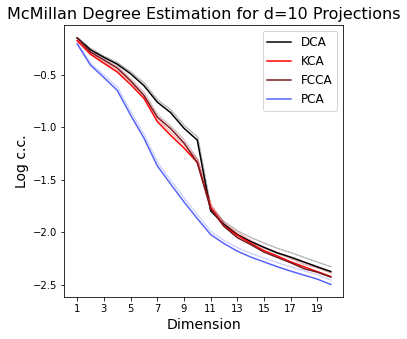

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

colors = ['black', 'red', '#781820', '#5563fa']
for i, dimreduc_method in enumerate(['DCA', 'KCA', 'LQGCA', 'PCA']):
    df_ = apply_df_filters(cc_df, drm=dimreduc_method)
    cc_vals = np.array([np.log(c[0:20]) for c in df_['cc'].values])
    ax.fill_between(np.arange(20) + 1, np.mean(cc_vals, axis=0) + np.std(cc_vals, axis=0)/np.sqrt(28),
                    np.mean(cc_vals, axis=0) + np.std(cc_vals, axis=0)/np.sqrt(28), alpha=0.25, color=colors[i])
    ax.plot(np.arange(20) + 1, np.mean(cc_vals, axis=0), color=colors[i])
ax.set_ylabel('Log c.c.', fontsize=14)
ax.set_xlabel('Dimension', fontsize=14)
ax.set_xticks(np.arange(1, 21, 2))
ax.set_xticklabels(np.arange(1, 21, 2))
ax.set_title('McMillan Degree Estimation for d=10 Projections', fontsize=16)
ax.legend(['DCA', 'KCA', 'FCCA', 'PCA'], fontsize=12)
fig.savefig('cc.pdf', bbox_inches='tight', pad_inches=0)

In [38]:
from neurosim.models.var import form_companion

In [39]:
# Now do subspace identification/VAR inference within these 
# results = []
resultsd3 = []
for i, data_file in tqdm(enumerate(data_files)):
    dat = load_sabes('%s/%s' % (dpath, data_file))
    y = np.squeeze(dat['spike_rates'])
    for dimreduc_method in ['DCA', 'KCA', 'LQGCA', 'PCA']:
        df_ = apply_df_filters(sabes_df, data_file=data_file, fold_idx=0, dim=6, dimreduc_method=dimreduc_method)
        if dimreduc_method == 'LQGCA':
            df_ = apply_df_filters(df_, dimreduc_args={'T': 3, 'loss_type': 'trace', 'n_init': 5})
        V = df_.iloc[0]['coef']
        if dimreduc_method == 'PCA':
            V = V[:, 0:6]        
        # Project data
        yproj = y @ V

        result_ = {}
        result_['data_file'] = data_file
        result_['dimreduc_method'] = dimreduc_method

        # Fit subspace identification
        ssid = SubspaceIdentification()
        A, C, Cbar, L0, Q, R, S = ssid.identify(yproj, order=6)

        result_['ssid_A'] = A

        # Fit VAR(1) and VAR(2)
        varmodel = VAR(estimator='ols', order=1)
        varmodel.fit(yproj)
        result_['var1_A'] = form_companion(varmodel.coef_) 

        varmodel = VAR(estimator='ols', order=2)
        varmodel.fit(yproj)
        result_['var2_A'] = form_companion(varmodel.coef_)

        resultsd3.append(result_)


0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.17s/it]
Rows of VAR matrix processed: 6it [00:00, 838.75it/s]
Rows of VAR matrix processed: 6it [00:00, 382.06it/s]
Rows of VAR matrix processed: 6it [00:00, 930.55it/s]
Rows of VAR matrix processed: 6it [00:00, 440.02it/s]
Rows of VAR matrix processed: 6it [00:00, 752.66it/s]
Rows of VAR matrix processed: 6it [00:00, 322.47it/s]
Rows of VAR matrix processed: 6it [00:00, 902.78it/s]
Rows of VAR matrix processed: 6it [00:00, 346.97it/s]
1it [00:16, 16.68s/it]

Processing spikes


100%|██████████| 1/1 [00:22<00:00, 22.30s/it]
Rows of VAR matrix processed: 6it [00:00, 652.57it/s]
Rows of VAR matrix processed: 6it [00:00, 281.22it/s]
Rows of VAR matrix processed: 6it [00:00, 620.60it/s]
Rows of VAR matrix processed: 6it [00:00, 236.01it/s]
Rows of VAR matrix processed: 6it [00:00, 722.82it/s]
Rows of VAR matrix processed: 6it [00:00, 268.81it/s]
Rows of VAR matrix processed: 6it [00:00, 727.97it/s]
Rows of VAR matrix processed: 6it [00:00, 278.10it/s]
2it [00:39, 20.33s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.58s/it]
Rows of VAR matrix processed: 6it [00:00, 1981.72it/s]
Rows of VAR matrix processed: 6it [00:00, 1030.04it/s]
Rows of VAR matrix processed: 6it [00:00, 1918.27it/s]
Rows of VAR matrix processed: 6it [00:00, 959.39it/s]
Rows of VAR matrix processed: 6it [00:00, 1788.87it/s]
Rows of VAR matrix processed: 6it [00:00, 1036.10it/s]
Rows of VAR matrix processed: 6it [00:00, 2118.87it/s]
Rows of VAR matrix processed: 6it [00:00, 989.14it/s]
3it [00:44, 13.26s/it]

Processing spikes


100%|██████████| 1/1 [00:30<00:00, 30.43s/it]
Rows of VAR matrix processed: 6it [00:00, 513.53it/s]
Rows of VAR matrix processed: 6it [00:00, 191.51it/s]
Rows of VAR matrix processed: 6it [00:00, 499.75it/s]
Rows of VAR matrix processed: 6it [00:00, 194.59it/s]
Rows of VAR matrix processed: 6it [00:00, 509.21it/s]
Rows of VAR matrix processed: 6it [00:00, 180.60it/s]
Rows of VAR matrix processed: 6it [00:00, 511.40it/s]
Rows of VAR matrix processed: 6it [00:00, 183.77it/s]
4it [01:15, 20.34s/it]

Processing spikes


100%|██████████| 1/1 [00:13<00:00, 13.33s/it]
Rows of VAR matrix processed: 6it [00:00, 1236.53it/s]
Rows of VAR matrix processed: 6it [00:00, 441.28it/s]
Rows of VAR matrix processed: 6it [00:00, 1116.45it/s]
Rows of VAR matrix processed: 6it [00:00, 436.03it/s]
Rows of VAR matrix processed: 6it [00:00, 1124.68it/s]
Rows of VAR matrix processed: 6it [00:00, 438.22it/s]
Rows of VAR matrix processed: 6it [00:00, 919.27it/s]
Rows of VAR matrix processed: 6it [00:00, 434.03it/s]
5it [01:29, 17.96s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.47s/it]
Rows of VAR matrix processed: 6it [00:00, 2281.58it/s]
Rows of VAR matrix processed: 6it [00:00, 1279.21it/s]
Rows of VAR matrix processed: 6it [00:00, 2257.02it/s]
Rows of VAR matrix processed: 6it [00:00, 902.29it/s]
Rows of VAR matrix processed: 6it [00:00, 2002.05it/s]
Rows of VAR matrix processed: 6it [00:00, 1064.05it/s]
Rows of VAR matrix processed: 6it [00:00, 2673.52it/s]
Rows of VAR matrix processed: 6it [00:00, 1297.41it/s]
6it [01:33, 13.12s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.34s/it]
Rows of VAR matrix processed: 6it [00:00, 2573.19it/s]
Rows of VAR matrix processed: 6it [00:00, 1249.85it/s]
Rows of VAR matrix processed: 6it [00:00, 2320.29it/s]
Rows of VAR matrix processed: 6it [00:00, 1299.42it/s]
Rows of VAR matrix processed: 6it [00:00, 2347.12it/s]
Rows of VAR matrix processed: 6it [00:00, 1307.72it/s]
Rows of VAR matrix processed: 6it [00:00, 2322.86it/s]
Rows of VAR matrix processed: 6it [00:00, 1296.07it/s]
7it [01:36, 10.01s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.19s/it]
Rows of VAR matrix processed: 6it [00:00, 1720.27it/s]
Rows of VAR matrix processed: 6it [00:00, 1098.99it/s]
Rows of VAR matrix processed: 6it [00:00, 2154.05it/s]
Rows of VAR matrix processed: 6it [00:00, 1078.50it/s]
Rows of VAR matrix processed: 6it [00:00, 2095.41it/s]
Rows of VAR matrix processed: 6it [00:00, 1103.28it/s]
Rows of VAR matrix processed: 6it [00:00, 2014.56it/s]
Rows of VAR matrix processed: 6it [00:00, 1061.89it/s]
8it [01:41,  8.25s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.70s/it]
Rows of VAR matrix processed: 6it [00:00, 2333.63it/s]
Rows of VAR matrix processed: 6it [00:00, 1088.72it/s]
Rows of VAR matrix processed: 6it [00:00, 2232.99it/s]
Rows of VAR matrix processed: 6it [00:00, 1175.04it/s]
Rows of VAR matrix processed: 6it [00:00, 2251.37it/s]
Rows of VAR matrix processed: 6it [00:00, 1120.77it/s]
Rows of VAR matrix processed: 6it [00:00, 1978.29it/s]
Rows of VAR matrix processed: 6it [00:00, 1107.75it/s]
9it [01:45,  6.91s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.41s/it]
Rows of VAR matrix processed: 6it [00:00, 2100.65it/s]
Rows of VAR matrix processed: 6it [00:00, 1284.43it/s]
Rows of VAR matrix processed: 6it [00:00, 2308.16it/s]
Rows of VAR matrix processed: 6it [00:00, 1256.47it/s]
Rows of VAR matrix processed: 6it [00:00, 2298.46it/s]
Rows of VAR matrix processed: 6it [00:00, 1251.53it/s]
Rows of VAR matrix processed: 6it [00:00, 1731.28it/s]
Rows of VAR matrix processed: 6it [00:00, 1246.57it/s]
10it [01:48,  5.91s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.58s/it]
Rows of VAR matrix processed: 6it [00:00, 1900.45it/s]
Rows of VAR matrix processed: 6it [00:00, 1054.55it/s]
Rows of VAR matrix processed: 6it [00:00, 2041.85it/s]
Rows of VAR matrix processed: 6it [00:00, 1012.42it/s]
Rows of VAR matrix processed: 6it [00:00, 1934.79it/s]
Rows of VAR matrix processed: 6it [00:00, 1029.53it/s]
Rows of VAR matrix processed: 6it [00:00, 1846.90it/s]
Rows of VAR matrix processed: 6it [00:00, 1030.75it/s]
11it [01:53,  5.58s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.47s/it]
Rows of VAR matrix processed: 6it [00:00, 2007.32it/s]
Rows of VAR matrix processed: 6it [00:00, 1043.06it/s]
Rows of VAR matrix processed: 6it [00:00, 1975.80it/s]
Rows of VAR matrix processed: 6it [00:00, 1000.23it/s]
Rows of VAR matrix processed: 6it [00:00, 2056.70it/s]
Rows of VAR matrix processed: 6it [00:00, 1019.81it/s]
Rows of VAR matrix processed: 6it [00:00, 1796.28it/s]
Rows of VAR matrix processed: 6it [00:00, 967.58it/s]
12it [01:58,  5.33s/it]

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.06s/it]
Rows of VAR matrix processed: 6it [00:00, 1482.70it/s]
Rows of VAR matrix processed: 6it [00:00, 880.57it/s]
Rows of VAR matrix processed: 6it [00:00, 1749.94it/s]
Rows of VAR matrix processed: 6it [00:00, 861.11it/s]
Rows of VAR matrix processed: 6it [00:00, 1762.07it/s]
Rows of VAR matrix processed: 6it [00:00, 824.54it/s]
Rows of VAR matrix processed: 6it [00:00, 1724.63it/s]
Rows of VAR matrix processed: 6it [00:00, 839.84it/s]
13it [02:04,  5.64s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.72s/it]
Rows of VAR matrix processed: 6it [00:00, 2182.83it/s]
Rows of VAR matrix processed: 6it [00:00, 883.17it/s]
Rows of VAR matrix processed: 6it [00:00, 1849.61it/s]
Rows of VAR matrix processed: 6it [00:00, 825.92it/s]
Rows of VAR matrix processed: 6it [00:00, 1826.92it/s]
Rows of VAR matrix processed: 6it [00:00, 945.55it/s]
Rows of VAR matrix processed: 6it [00:00, 2064.13it/s]
Rows of VAR matrix processed: 6it [00:00, 1017.25it/s]
14it [02:09,  5.45s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.73s/it]
Rows of VAR matrix processed: 6it [00:00, 2044.01it/s]
Rows of VAR matrix processed: 6it [00:00, 1029.45it/s]
Rows of VAR matrix processed: 6it [00:00, 1789.00it/s]
Rows of VAR matrix processed: 6it [00:00, 998.96it/s]
Rows of VAR matrix processed: 6it [00:00, 2018.27it/s]
Rows of VAR matrix processed: 6it [00:00, 975.65it/s]
Rows of VAR matrix processed: 6it [00:00, 1994.44it/s]
Rows of VAR matrix processed: 6it [00:00, 835.91it/s]
15it [02:14,  5.32s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.52s/it]
Rows of VAR matrix processed: 6it [00:00, 1931.67it/s]
Rows of VAR matrix processed: 6it [00:00, 1067.84it/s]
Rows of VAR matrix processed: 6it [00:00, 2064.63it/s]
Rows of VAR matrix processed: 6it [00:00, 954.52it/s]
Rows of VAR matrix processed: 6it [00:00, 1761.70it/s]
Rows of VAR matrix processed: 6it [00:00, 973.27it/s]
Rows of VAR matrix processed: 6it [00:00, 1841.90it/s]
Rows of VAR matrix processed: 6it [00:00, 933.00it/s]
16it [02:19,  5.16s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.31s/it]
Rows of VAR matrix processed: 6it [00:00, 1932.56it/s]
Rows of VAR matrix processed: 6it [00:00, 914.32it/s]
Rows of VAR matrix processed: 6it [00:00, 2240.75it/s]
Rows of VAR matrix processed: 6it [00:00, 1047.14it/s]
Rows of VAR matrix processed: 6it [00:00, 2445.90it/s]
Rows of VAR matrix processed: 6it [00:00, 1143.59it/s]
Rows of VAR matrix processed: 6it [00:00, 1791.42it/s]
Rows of VAR matrix processed: 6it [00:00, 1092.93it/s]
17it [02:24,  4.98s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.61s/it]
Rows of VAR matrix processed: 6it [00:00, 2051.34it/s]
Rows of VAR matrix processed: 6it [00:00, 1033.80it/s]
Rows of VAR matrix processed: 6it [00:00, 1997.92it/s]
Rows of VAR matrix processed: 6it [00:00, 927.33it/s]
Rows of VAR matrix processed: 6it [00:00, 2037.06it/s]
Rows of VAR matrix processed: 6it [00:00, 1024.92it/s]
Rows of VAR matrix processed: 6it [00:00, 1856.71it/s]
Rows of VAR matrix processed: 6it [00:00, 885.06it/s]
18it [02:29,  4.96s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.57s/it]
Rows of VAR matrix processed: 6it [00:00, 1884.66it/s]
Rows of VAR matrix processed: 6it [00:00, 1018.20it/s]
Rows of VAR matrix processed: 6it [00:00, 2023.30it/s]
Rows of VAR matrix processed: 6it [00:00, 1195.24it/s]
Rows of VAR matrix processed: 6it [00:00, 1326.47it/s]
Rows of VAR matrix processed: 6it [00:00, 1033.21it/s]
Rows of VAR matrix processed: 6it [00:00, 2394.01it/s]
Rows of VAR matrix processed: 6it [00:00, 1034.82it/s]
19it [02:33,  4.92s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.25s/it]
Rows of VAR matrix processed: 6it [00:00, 1540.89it/s]
Rows of VAR matrix processed: 6it [00:00, 784.42it/s]
Rows of VAR matrix processed: 6it [00:00, 1873.57it/s]
Rows of VAR matrix processed: 6it [00:00, 958.63it/s]
Rows of VAR matrix processed: 6it [00:00, 1926.20it/s]
Rows of VAR matrix processed: 6it [00:00, 934.84it/s]
Rows of VAR matrix processed: 6it [00:00, 1892.74it/s]
Rows of VAR matrix processed: 6it [00:00, 957.68it/s]
20it [02:39,  5.11s/it]

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.71s/it]
Rows of VAR matrix processed: 6it [00:00, 1576.41it/s]
Rows of VAR matrix processed: 6it [00:00, 786.21it/s]
Rows of VAR matrix processed: 6it [00:00, 1662.87it/s]
Rows of VAR matrix processed: 6it [00:00, 777.13it/s]
Rows of VAR matrix processed: 6it [00:00, 1690.23it/s]
Rows of VAR matrix processed: 6it [00:00, 750.84it/s]
Rows of VAR matrix processed: 6it [00:00, 1716.51it/s]
Rows of VAR matrix processed: 6it [00:00, 595.49it/s]
21it [02:46,  5.69s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.10s/it]
Rows of VAR matrix processed: 6it [00:00, 2515.83it/s]
Rows of VAR matrix processed: 6it [00:00, 1151.28it/s]
Rows of VAR matrix processed: 6it [00:00, 2189.47it/s]
Rows of VAR matrix processed: 6it [00:00, 1131.86it/s]
Rows of VAR matrix processed: 6it [00:00, 2001.90it/s]
Rows of VAR matrix processed: 6it [00:00, 1120.87it/s]
Rows of VAR matrix processed: 6it [00:00, 2440.68it/s]
Rows of VAR matrix processed: 6it [00:00, 1121.27it/s]
22it [02:50,  5.29s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.13s/it]
Rows of VAR matrix processed: 6it [00:00, 1604.35it/s]
Rows of VAR matrix processed: 6it [00:00, 971.54it/s]
Rows of VAR matrix processed: 6it [00:00, 1998.40it/s]
Rows of VAR matrix processed: 6it [00:00, 969.03it/s]
Rows of VAR matrix processed: 6it [00:00, 1935.68it/s]
Rows of VAR matrix processed: 6it [00:00, 973.83it/s]
Rows of VAR matrix processed: 6it [00:00, 1983.90it/s]
Rows of VAR matrix processed: 6it [00:00, 989.85it/s]
23it [02:56,  5.32s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.37s/it]
Rows of VAR matrix processed: 6it [00:00, 1617.13it/s]
Rows of VAR matrix processed: 6it [00:00, 974.06it/s]
Rows of VAR matrix processed: 6it [00:00, 1891.03it/s]
Rows of VAR matrix processed: 6it [00:00, 933.52it/s]
Rows of VAR matrix processed: 6it [00:00, 1825.33it/s]
Rows of VAR matrix processed: 6it [00:00, 948.47it/s]
Rows of VAR matrix processed: 6it [00:00, 2040.36it/s]
Rows of VAR matrix processed: 6it [00:00, 933.59it/s]
24it [03:01,  5.42s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.62s/it]
Rows of VAR matrix processed: 6it [00:00, 1964.09it/s]
Rows of VAR matrix processed: 6it [00:00, 903.33it/s]
Rows of VAR matrix processed: 6it [00:00, 1761.94it/s]
Rows of VAR matrix processed: 6it [00:00, 914.39it/s]
Rows of VAR matrix processed: 6it [00:00, 1938.37it/s]
Rows of VAR matrix processed: 6it [00:00, 892.72it/s]
Rows of VAR matrix processed: 6it [00:00, 1917.40it/s]
Rows of VAR matrix processed: 6it [00:00, 1136.82it/s]
25it [03:07,  5.56s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.31s/it]
Rows of VAR matrix processed: 6it [00:00, 1658.59it/s]
Rows of VAR matrix processed: 6it [00:00, 936.16it/s]
Rows of VAR matrix processed: 6it [00:00, 2116.55it/s]
Rows of VAR matrix processed: 6it [00:00, 1166.65it/s]
Rows of VAR matrix processed: 6it [00:00, 2076.22it/s]
Rows of VAR matrix processed: 6it [00:00, 1122.97it/s]
Rows of VAR matrix processed: 6it [00:00, 2085.68it/s]
Rows of VAR matrix processed: 6it [00:00, 1148.34it/s]
26it [03:13,  5.56s/it]

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.64s/it]
Rows of VAR matrix processed: 6it [00:00, 1739.29it/s]
Rows of VAR matrix processed: 6it [00:00, 770.99it/s]
Rows of VAR matrix processed: 6it [00:00, 1817.29it/s]
Rows of VAR matrix processed: 6it [00:00, 766.64it/s]
Rows of VAR matrix processed: 6it [00:00, 1707.66it/s]
Rows of VAR matrix processed: 6it [00:00, 743.85it/s]
Rows of VAR matrix processed: 6it [00:00, 1391.53it/s]
Rows of VAR matrix processed: 6it [00:00, 938.81it/s]
27it [03:20,  5.97s/it]

Processing spikes


100%|██████████| 1/1 [00:07<00:00,  7.32s/it]
Rows of VAR matrix processed: 6it [00:00, 1912.88it/s]
Rows of VAR matrix processed: 6it [00:00, 729.13it/s]
Rows of VAR matrix processed: 6it [00:00, 1552.01it/s]
Rows of VAR matrix processed: 6it [00:00, 759.26it/s]
Rows of VAR matrix processed: 6it [00:00, 1426.23it/s]
Rows of VAR matrix processed: 6it [00:00, 792.15it/s]
Rows of VAR matrix processed: 6it [00:00, 1607.73it/s]
Rows of VAR matrix processed: 6it [00:00, 748.49it/s]
28it [03:27,  7.42s/it]


In [41]:
A_df = pd.DataFrame(resultsd3)

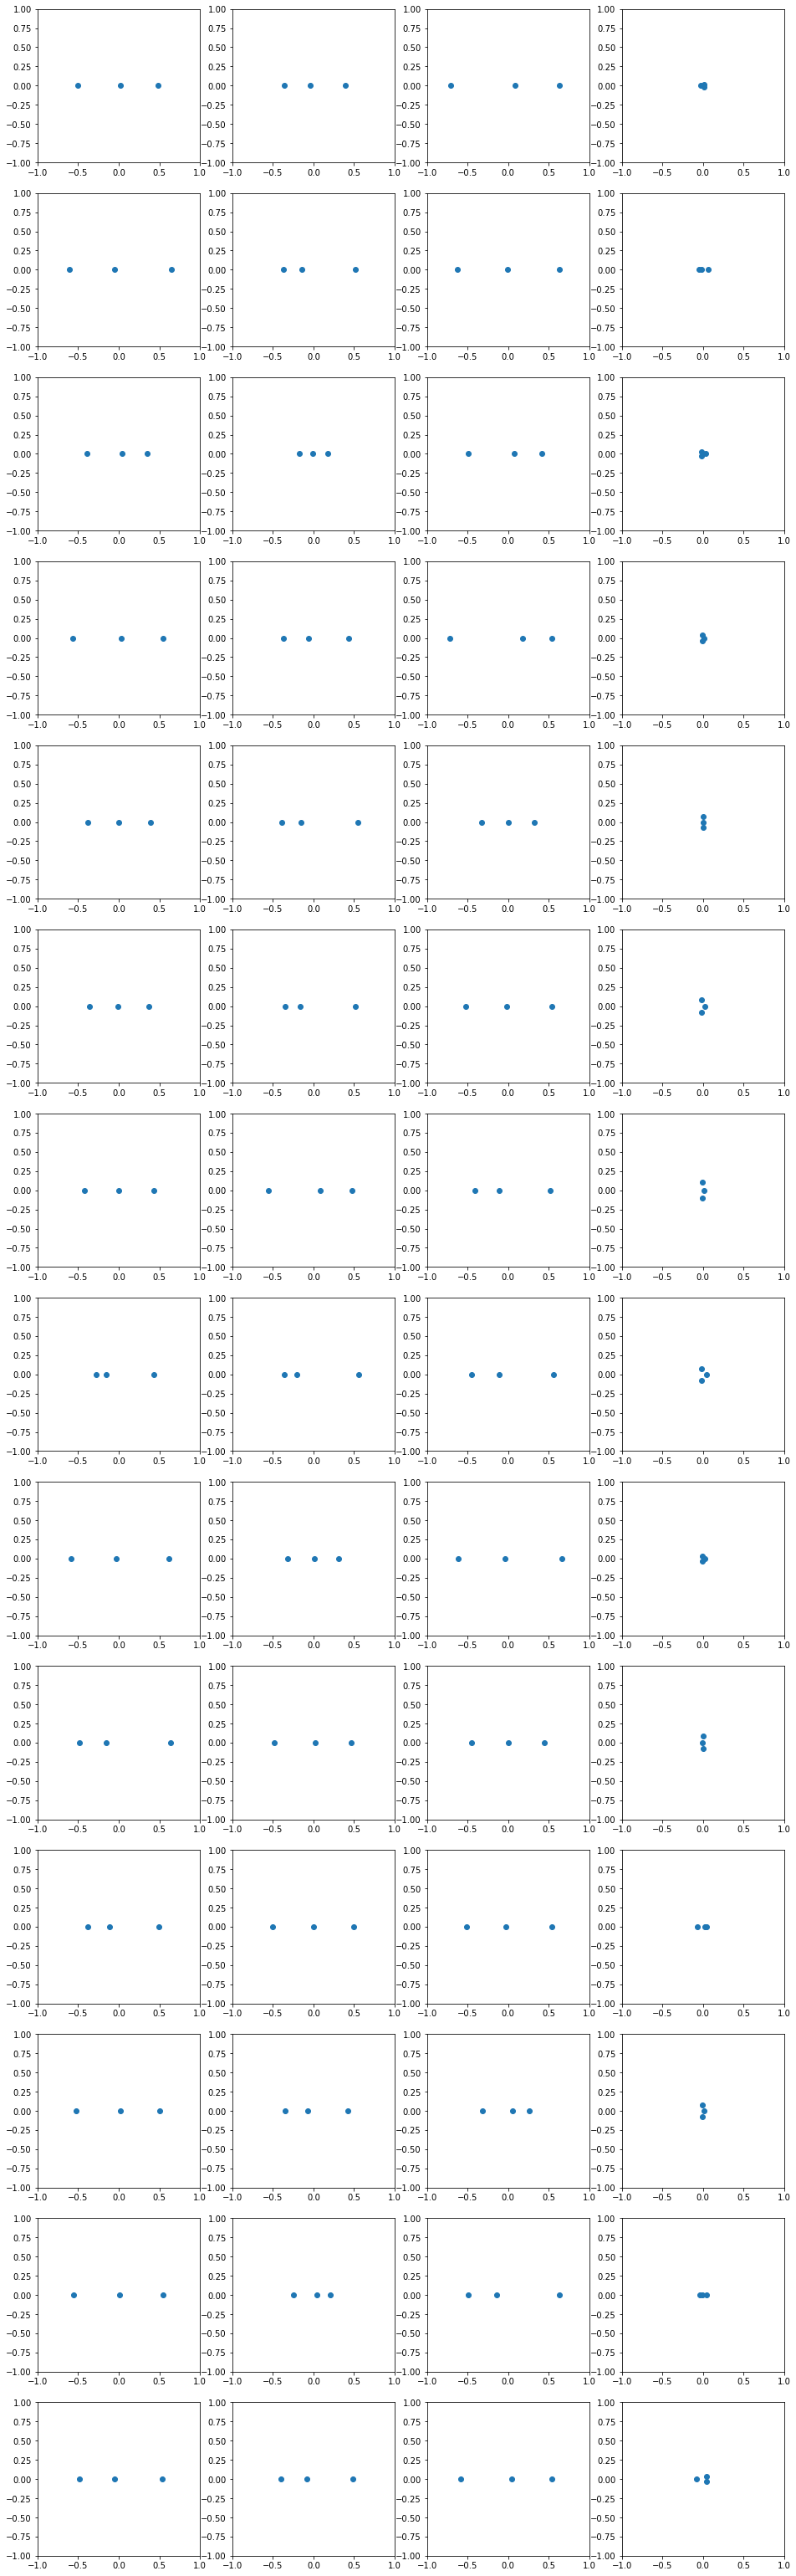

In [88]:
fig, ax = plt.subplots(14, 4, figsize=(16, 56))
for i in range(14):
    for j, dimreduc_method in enumerate(['DCA', 'KCA', 'LQGCA', 'PCA']):
        a = ax[i, j]
        df_ = apply_df_filters(A_df, data_file=data_files[i], dimreduc_method=dimreduc_method)
        eig = np.linalg.eigvals(df_.iloc[0]['var1_A'])
        a.scatter(np.real(eig), np.imag(eig))        
        a.set_xlim([-1, 1])
        a.set_ylim([-1, 1])        


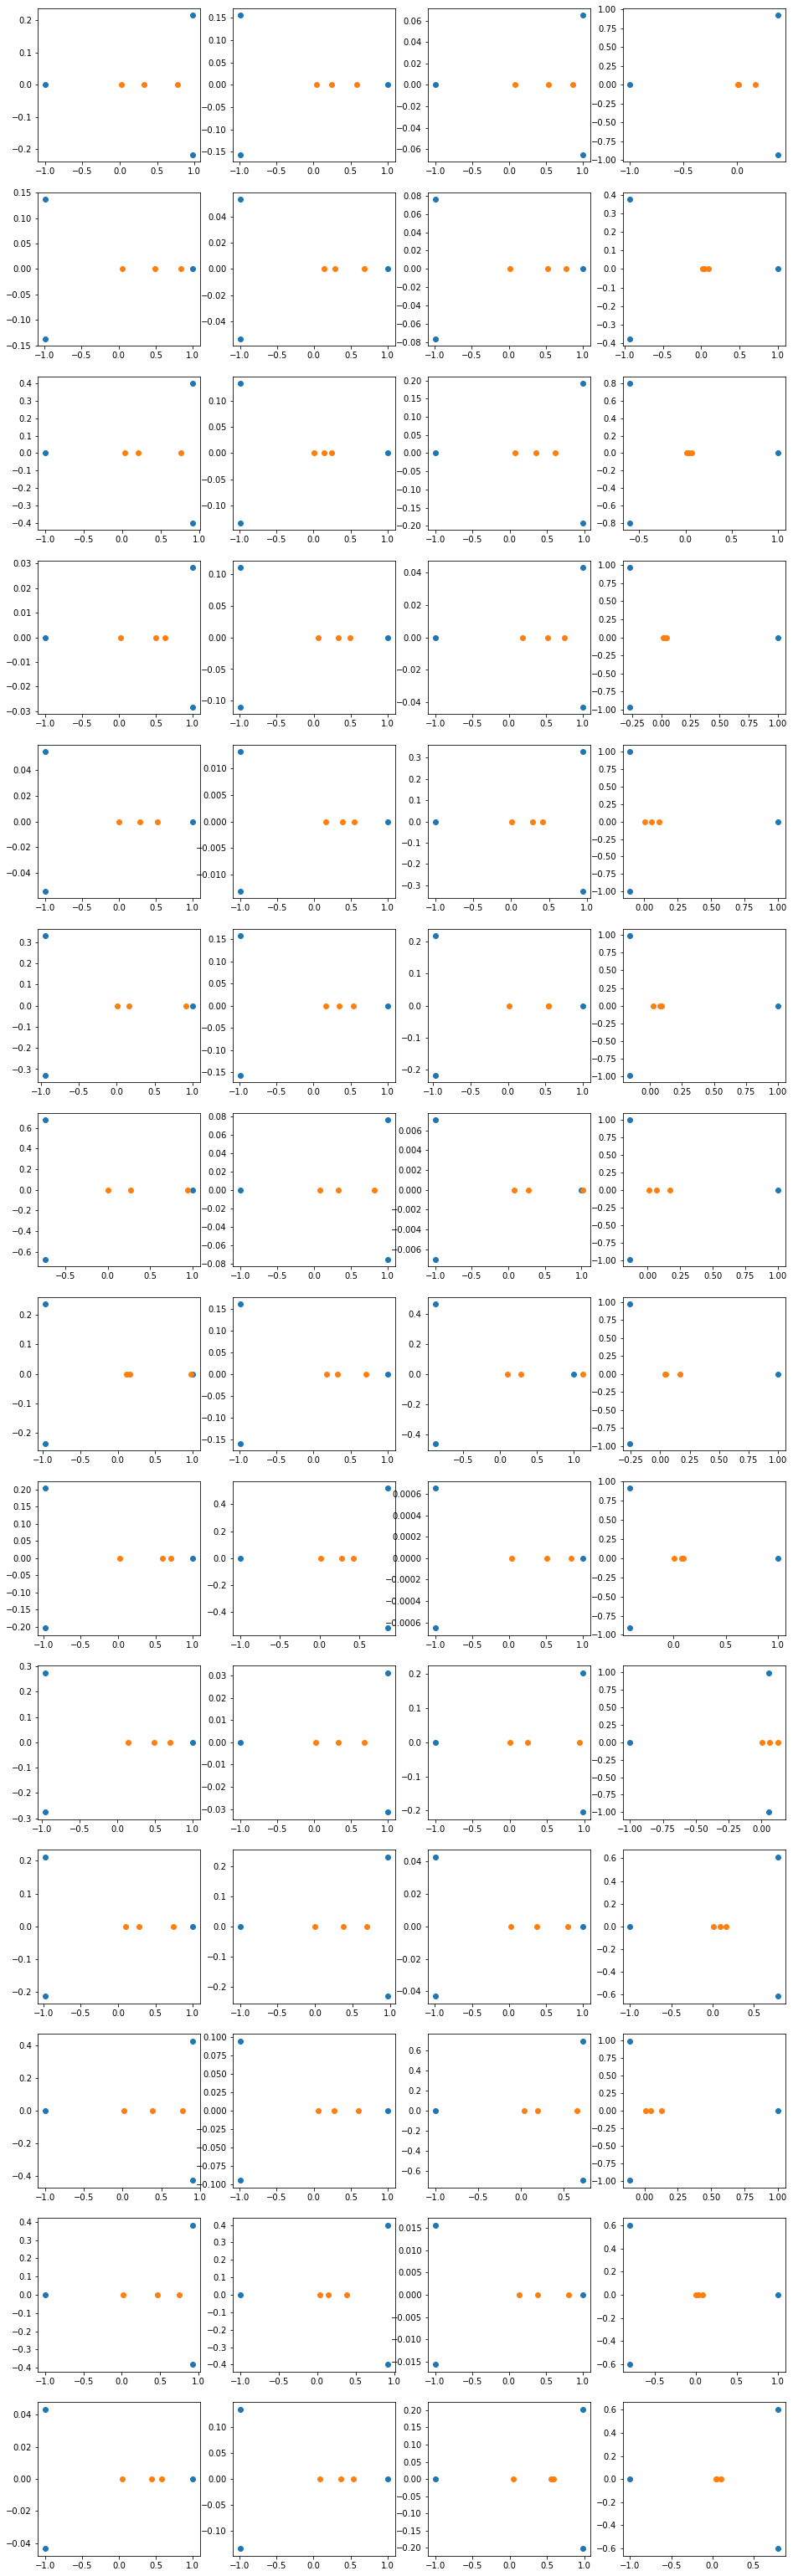

In [89]:
# Try polar decomposition next
fig, ax = plt.subplots(14, 4, figsize=(16, 56))
for i in range(14):
    for j, dimreduc_method in enumerate(['DCA', 'KCA', 'LQGCA', 'PCA']):
        a = ax[i, j]
        df_ = apply_df_filters(A_df, data_file=data_files[i], dimreduc_method=dimreduc_method)

        U, P = scipy.linalg.polar(df_.iloc[0]['var1_A'])
        Ueig = np.linalg.eigvals(U)
        Peig = np.linalg.eigvals(P)

        a.scatter(np.real(Ueig), np.imag(Ueig))        
        a.scatter(np.real(Peig), np.imag(Peig))        

        # a.set_xlim([-1, 1])
        # a.set_ylim([-1, 1])        


In [81]:
# Correlate loadings with scalar measure of non-normality

In [46]:
# Measure (1) largest amplification, (2) Angle between largest amplification vector and largest rotation vector, (3) 
d_U = np.zeros((28, 4, 3))
for i in range(28):
    for j, dimreduc_method in enumerate(['DCA', 'KCA', 'LQGCA', 'PCA']):
        df_ = apply_df_filters(A_df, data_file=data_files[i], dimreduc_method=dimreduc_method)
        A = df_.iloc[0]['ssid_A']
        U, P = scipy.linalg.polar(A)
        d_U[i, j, 0] = np.linalg.norm(A - U)/np.linalg.norm(A)
        A = df_.iloc[0]['var1_A']
        U, P = scipy.linalg.polar(A)
        d_U[i, j, 1] = np.linalg.norm(A - U)/np.linalg.norm(A)
        A = df_.iloc[0]['var2_A']
        U, P = scipy.linalg.polar(A)
        d_U[i, j, 2] = np.linalg.norm(A - U)/np.linalg.norm(A)


In [100]:
# Perfect!

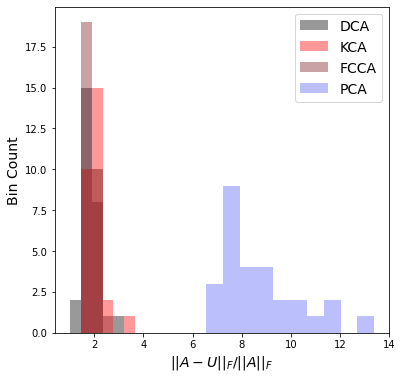

In [52]:
type_ = 1
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
colors = ['black', 'red', '#781820', '#5563fa']
ax.hist(d_U[:, 0, type_], alpha=0.4, color=colors[0], bins=np.linspace(1, 5, 10))
ax.hist(d_U[:, 1, type_], alpha=0.4, color=colors[1], bins=np.linspace(1, 5, 10))
ax.hist(d_U[:, 2, type_], alpha=0.4, color=colors[2], bins=np.linspace(1, 5, 10))
ax.hist(d_U[:, 3, type_], alpha=0.4, color=colors[3])
ax.set_xlabel(r'$||A - U||_F/||A||_F$', fontsize=14)
ax.set_ylabel('Bin Count', fontsize=14)
ax.legend(['DCA', 'KCA', 'FCCA', 'PCA'], fontsize=14)
fig.savefig('rotation.pdf', bbox_inches='tight', pad_inches=0)

In [101]:
# Compute all pairwise correlations between loadings

In [53]:
from utils import calc_loadings

In [20]:
r = np.zeros((28, 5, 4, 4))
data_files = np.unique(sabes_df['data_file'].values)
for i, data_file in tqdm(enumerate(data_files)):
    for fold_idx in range(5):
        loadings = []
        for dimreduc_method in ['DCA', 'KCA', 'LQGCA', 'PCA']:
            df_ = apply_df_filters(sabes_df, data_file=data_file, fold_idx=fold_idx, dim=2, dimreduc_method=dimreduc_method)
            if dimreduc_method == 'LQGCA':
                df_ = apply_df_filters(df_, dimreduc_args={'T': 3, 'loss_type': 'trace', 'n_init': 5})
            V = df_.iloc[0]['coef']
            if dimreduc_method == 'PCA':
                V = V[:, 0:2]        

            loadings.append(calc_loadings(V))

        for j in range(len(loadings)):
            for k in range(len(loadings)):
                r[i, fold_idx, j, k] = scipy.stats.spearmanr(loadings[j], loadings[k])[0]

28it [00:02, 11.60it/s]


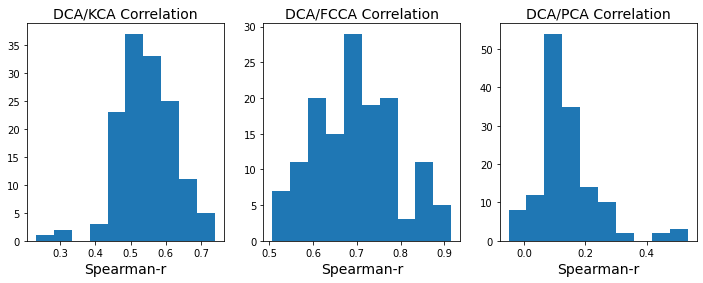

In [60]:
# fig, ax = plt.subplots(4, 4, figsize=(16, 16))
# for i in range(4):
#     for j in range(4):
#         ax[i, j].hist(r[..., i, j].ravel())
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].hist(r[..., 0, 1].ravel())
ax[0].set_title('DCA/KCA Correlation', fontsize=14)
ax[1].hist(r[..., 0, 2].ravel())
ax[1].set_title('DCA/FCCA Correlation', fontsize=14)
ax[2].hist(r[..., 0, 3].ravel())
ax[2].set_title('DCA/PCA Correlation', fontsize=14)
for i in range(3):
    ax[i].set_xlabel('Spearman-r', fontsize=14)

fig.savefig('loading_correlation.pdf', bbox_inches='tight', pad_inches=0)

In [107]:
# Can we correlate with the non-normality of A

In [18]:
with open('/home/akumar/nse/neural_control/data/sabes_var_df.dat', 'rb') as f:
    var_df = pickle.load(f)

In [113]:
var_df.keys()

Index(['scores_supports', 'coef', 'data_file', 'loader_args',
       'estimation_score', 'penalty', 'fold_idx', 'r2', 'A', 'W', 'r2_kin',
       'r2_kin_lagged', 'graph_stats'],
      dtype='object')

In [52]:
nn = np.zeros((28, 5))
ns = np.zeros((28, 5))
s = np.zeros((28, 5))
nn2 = np.zeros((28, 5))

for i, data_file in enumerate(data_files):
    for fold_idx in range(5):
        var_df_ = apply_df_filters(var_df, data_file=data_file, fold_idx=fold_idx)
        A = var_df_.iloc[0]['A']        
        nn[i, fold_idx] = np.linalg.norm(A @ A.T - A.T @ A)
        ns[i, fold_idx] = np.linalg.norm(A.T - A)
        eig, _ = np.linalg.eig(A)
        eigorder = np.argsort(np.abs(eig))[::-1]

        T, Z = scipy.linalg.schur(A, output='complex')
        _, S, _ = np.linalg.svd(A)
        nn2[i, fold_idx] = np.max(S - np.abs(eig[eigorder]))

        s[i, fold_idx] = np.linalg.norm(T - np.diag(np.diag(T)), 1)        



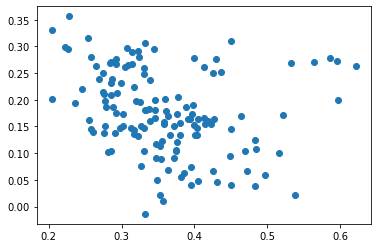

In [62]:
plt.scatter(nn2.ravel(), r[..., 1, 3].ravel())

In [64]:
scipy.stats.spearmanr(nn2.ravel(), r[..., 2, 3].ravel())

SpearmanrResult(correlation=-0.41189565065273015, pvalue=4.276647121636533e-07)

### Barycentric Plotting

In [8]:
# Barycentric plotting
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [9]:
with open('/home/akumar/nse/neural_control/data/sabes_decoding_df.dat', 'rb') as f:
    sabes_df = pickle.load(f)

In [10]:
# Try the raw leverage scores instead
loadings_l = []
data_files = np.unique(sabes_df['data_file'].values)

for i, data_file in tqdm(enumerate(data_files)):
    # Assemble loadings from dims 2-10
    for d in range(2, 11):
        loadings = []
        for dimreduc_method in ['DCA', 'KCA', 'LQGCA', 'PCA']:
            loadings_fold = []
            for fold_idx in range(5):            
                df_ = apply_df_filters(sabes_df, data_file=data_file, fold_idx=fold_idx, dim=d, dimreduc_method=dimreduc_method)
                if dimreduc_method == 'LQGCA':
                    df_ = apply_df_filters(df_, dimreduc_args={'T': 3, 'loss_type': 'trace', 'n_init': 5})
                V = df_.iloc[0]['coef']
                if dimreduc_method == 'PCA':
                    V = V[:, 0:2]        

                loadings_fold.append(calc_loadings(V))
                
            # Average loadings across folds
            loadings.append(np.mean(np.array(loadings_fold), axis=0))

        for j in range(loadings[0].size):
            d_ = {}
            d_['data_file'] = data_file
            d_['DCA_loadings'] = loadings[0][j]
            d_['KCA_loadings'] = loadings[1][j]
            d_['FCCA_loadings'] = loadings[2][j]
            d_['PCA_loadings'] = loadings[3][j]
            d_['nidx'] = j
            d_['dim'] = d
            loadings_l.append(d_)           
           

loadings_df = pd.DataFrame(loadings_l)

28it [00:15,  1.77it/s]


In [ ]:
# Plot the above for each dataset

In [36]:
# # Assembling peanut dataframe
# # peanut_dimreduc_files = glob.glob('/mnt/Secondary/data/peanut_dimreduc/peanut_dimreduc*.dat')
# # p_l = []
# # for i, f_ in enumerate(peanut_dimreduc_files):
# #     with open(f_, 'rb') as f:
# #         r = pickle.load(f)
# #     p_l.extend(r)
# # peanut_df = pd.DataFrame(p_l)

# # with open('/home/akumar/nse/neural_control/data/peanut_dimreduc_df.dat', 'wb') as f:
# #     f.write(pickle.dumps(peanut_df))


# Assembling cv dataframe
# cv_dimreduc_files = glob.glob('/mnt/Secondary/data/cv_dimreduc/cv_dimreduc*.dat')
# p_l = []
# for i, f_ in enumerate(cv_dimreduc_files):
#     with open(f_, 'rb') as f:
#         r = pickle.load(f)
#     p_l.extend(r)
# cv_df = pd.DataFrame(p_l)

# with open('/home/akumar/nse/neural_control/data/cv_dimreduc_df.dat', 'wb') as f:
#     f.write(pickle.dumps(cv_df))

# loco_dimreduc_files = glob.glob('/mnt/Secondary/data/loco_dimreduc/loco_dimreduc*.dat')
# p_l = []
# for i, f_ in enumerate(loco_dimreduc_files):
#     with open(f_, 'rb') as f:
#         r = pickle.load(f)

#     # Need to grab the loader args so we can differentiate between M1 and S1
#     argno = f_.split('.dat')[-2].split('_')[-1]
#     argfile = '/'.join(f_.split('/')[:-1]) + '/arg%s.dat' % argno
#     with open(argfile, 'rb') as f:
#         args = pickle.load(f)

#     for r_ in r:
#         r_['region'] = args['loader_args']['region']
#         r_['data_file'] = args['data_file']
#     p_l.extend(r)

# loco_df = pd.DataFrame(p_l)

# with open('/home/akumar/nse/neural_control/data/loco_dimreduc_df.dat', 'wb') as f:
#     f.write(pickle.dumps(loco_df))

In [11]:
with open('/home/akumar/nse/neural_control/data/peanut_dimreduc_df.dat', 'rb') as f:
    peanut_df = pickle.load(f)

In [12]:
with open('/home/akumar/nse/neural_control/data/cv_dimreduc_df.dat', 'rb') as f:
    cv_df = pickle.load(f)

In [13]:
with open('/home/akumar/nse/neural_control/data/loco_dimreduc_df.dat', 'rb') as f:
    loco_df = pickle.load(f)

In [18]:

# Try the raw leverage scores instead
loadings_l = []
epochs = np.unique(peanut_df['epoch'].values)
for i, epoch in tqdm(enumerate(epochs)):
    # Assemble loadings from dims 2-10
    for d in range(2, 11):
        loadings = []
        for dimreduc_method in ['DCA', 'KCA', 'LQGCA', 'PCA']:
            loadings_fold = []
            for fold_idx in range(5):            
                df_ = apply_df_filters(peanut_df, epoch=epoch, fold_idx=fold_idx, dim=d, dimreduc_method=dimreduc_method)
                if dimreduc_method == 'LQGCA':
                    df_ = apply_df_filters(df_, dimreduc_args={'T': 3, 'loss_type': 'trace', 'n_init': 5})
                V = df_.iloc[0]['coef']
                if dimreduc_method == 'PCA':
                    V = V[:, 0:2]        

                loadings_fold.append(calc_loadings(V))
                
            # Average loadings across folds
            loadings.append(np.mean(np.array(loadings_fold), axis=0))

        for j in range(loadings[0].size):
            d_ = {}
            d_['epoch'] = epoch
            d_['DCA_loadings'] = loadings[0][j]
            d_['KCA_loadings'] = loadings[1][j]
            d_['FCCA_loadings'] = loadings[2][j]
            d_['PCA_loadings'] = loadings[3][j]
            d_['nidx'] = j
            d_['dim'] = d
            loadings_l.append(d_)           
           
ploadings_df = pd.DataFrame(loadings_l)

8it [00:01,  6.21it/s]


In [38]:
# Try the raw leverage scores instead
loadings_l = []

for d in range(2, 11):
    loadings = []
    for dimreduc_method in ['DCA', 'KCA', 'LQGCA', 'PCA']:
        loadings_fold = []
        for fold_idx in range(5):            
            df_ = apply_df_filters(cv_df, fold_idx=fold_idx, dim=d, dimreduc_method=dimreduc_method)
            if dimreduc_method == 'LQGCA':
                df_ = apply_df_filters(df_, dimreduc_args={'T': 3, 'loss_type': 'trace', 'n_init': 5})
            V = df_.iloc[0]['coef']
            if dimreduc_method == 'PCA':
                V = V[:, 0:2]        

            loadings_fold.append(calc_loadings(V))
            
        # Average loadings across folds
        loadings.append(np.mean(np.array(loadings_fold), axis=0))

    for j in range(loadings[0].size):
        d_ = {}
        d_['DCA_loadings'] = loadings[0][j]
        d_['KCA_loadings'] = loadings[1][j]
        d_['FCCA_loadings'] = loadings[2][j]
        d_['PCA_loadings'] = loadings[3][j]
        d_['nidx'] = j
        d_['dim'] = d
        loadings_l.append(d_)           

cvloadings_df = pd.DataFrame(loadings_l)

In [40]:
loadings_l = []
data_files = np.unique(loco_df['data_file'].values)
for i, data_file in tqdm(enumerate(data_files)):
    # Assemble loadings from dims 2-10
    for d in range(2, 11):
        loadings = []
        for dimreduc_method in ['DCA', 'KCA', 'LQGCA', 'PCA']:
            loadings_fold = []
            for fold_idx in range(5):            
                df_ = apply_df_filters(loco_df, data_file=data_file, fold_idx=fold_idx, dim=d, dimreduc_method=dimreduc_method, region='S1')
                if dimreduc_method == 'LQGCA':
                    df_ = apply_df_filters(df_, dimreduc_args={'T': 3, 'loss_type': 'trace', 'n_init': 5})
                V = df_.iloc[0]['coef']
                if dimreduc_method == 'PCA':
                    V = V[:, 0:2]        

                loadings_fold.append(calc_loadings(V))
                
            # Average loadings across folds
            loadings.append(np.mean(np.array(loadings_fold), axis=0))

        for j in range(loadings[0].size):
            d_ = {}
            d_['data_file'] = data_file
            d_['DCA_loadings'] = loadings[0][j]
            d_['KCA_loadings'] = loadings[1][j]
            d_['FCCA_loadings'] = loadings[2][j]
            d_['PCA_loadings'] = loadings[3][j]
            d_['nidx'] = j
            d_['dim'] = d
            loadings_l.append(d_)               
           
locoloadings_df = pd.DataFrame(loadings_l)

10it [00:04,  2.41it/s]


In [41]:
# Filter down to just 5 recording sessions for sabes
data_files = np.unique(loadings_df['data_file'].values)[0:5]
itrim_df = loadings_df.loc[[f in data_files for f in loadings_df['data_file']]]

data_files = np.unique(locoloadings_df['data_file'].values)[0:5]
ltrim_df = locoloadings_df.loc[[f in data_files for f in locoloadings_df['data_file']]]

In [42]:
# Plot triangular loading plot for the 3 datasets
fig = go.Figure(layout={'width':1500, 'height':800})
fig = make_subplots(figure=fig, rows=2, cols=4, specs=[[{'type':'ternary'} for j in range(4)] for i in range(2)])

dfs = [itrim_df, ltrim_df, ploadings_df, cvloadings_df]

for i in range(4):
    df_ = dfs[i]
    fig.add_trace(go.Scatterternary(a=df_['FCCA_loadings'].values, b=df_['KCA_loadings'].values, c=df_['PCA_loadings'].values,
                  opacity=0.8, mode="markers", marker={'opacity':0.5, 'color':'black'}, cliponaxis=False, showlegend=False, text=['', '', '']), 
                  row=1, col=i + 1)
    fig.add_trace(go.Scatterternary(a=df_['DCA_loadings'].values, b=df_['FCCA_loadings'].values, c=df_['PCA_loadings'].values,
                  opacity=0.8, mode="markers", marker={'opacity':0.5, 'color':'black'}, cliponaxis=False, showlegend=False, text=['', '', '']), 
                  row=2, col=i + 1)

for i in range(8):
    fig.update_layout({'ternary%i' % (i + 1):{'aaxis':{'title':' ', 'linewidth':0},
                                'baxis':{'title':' ', 'linewidth':0},
                                'caxis':{'title':' ', 'linewidth':0}}})
    fig.update_layout({'ternary%i' % (i + 1):{'aaxis':{'title':' ', 'linewidth':0},
                                'baxis':{'title':' ', 'linewidth':0},
                                'caxis':{'title':' ', 'linewidth':0}}})

# fig.add_annotation(x=0, y=1.2 * np.cos(np.pi/3), text='DCA_loadings', showarrow=False, textangle=300, font={'size':16}, xref='x1', yref='y1')
# fig.add_annotation(x=0, y=1.2 * np.cos(np.pi/3), text='Hello', showarrow=False, textangle=300, font={'size':16})

#fig.update_layout(xaxis={'layer':'below traces'}, yaxis={'layer':'below traces'})
fig.show()
# Manually add axes labels
#fig.write_image('barycentric_plot.pdf')

### Single Unit Calculations